In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_dir = os.path.join('/content/gdrive/MyDrive/Dataset/Garbage/Garbage classification')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [ ]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


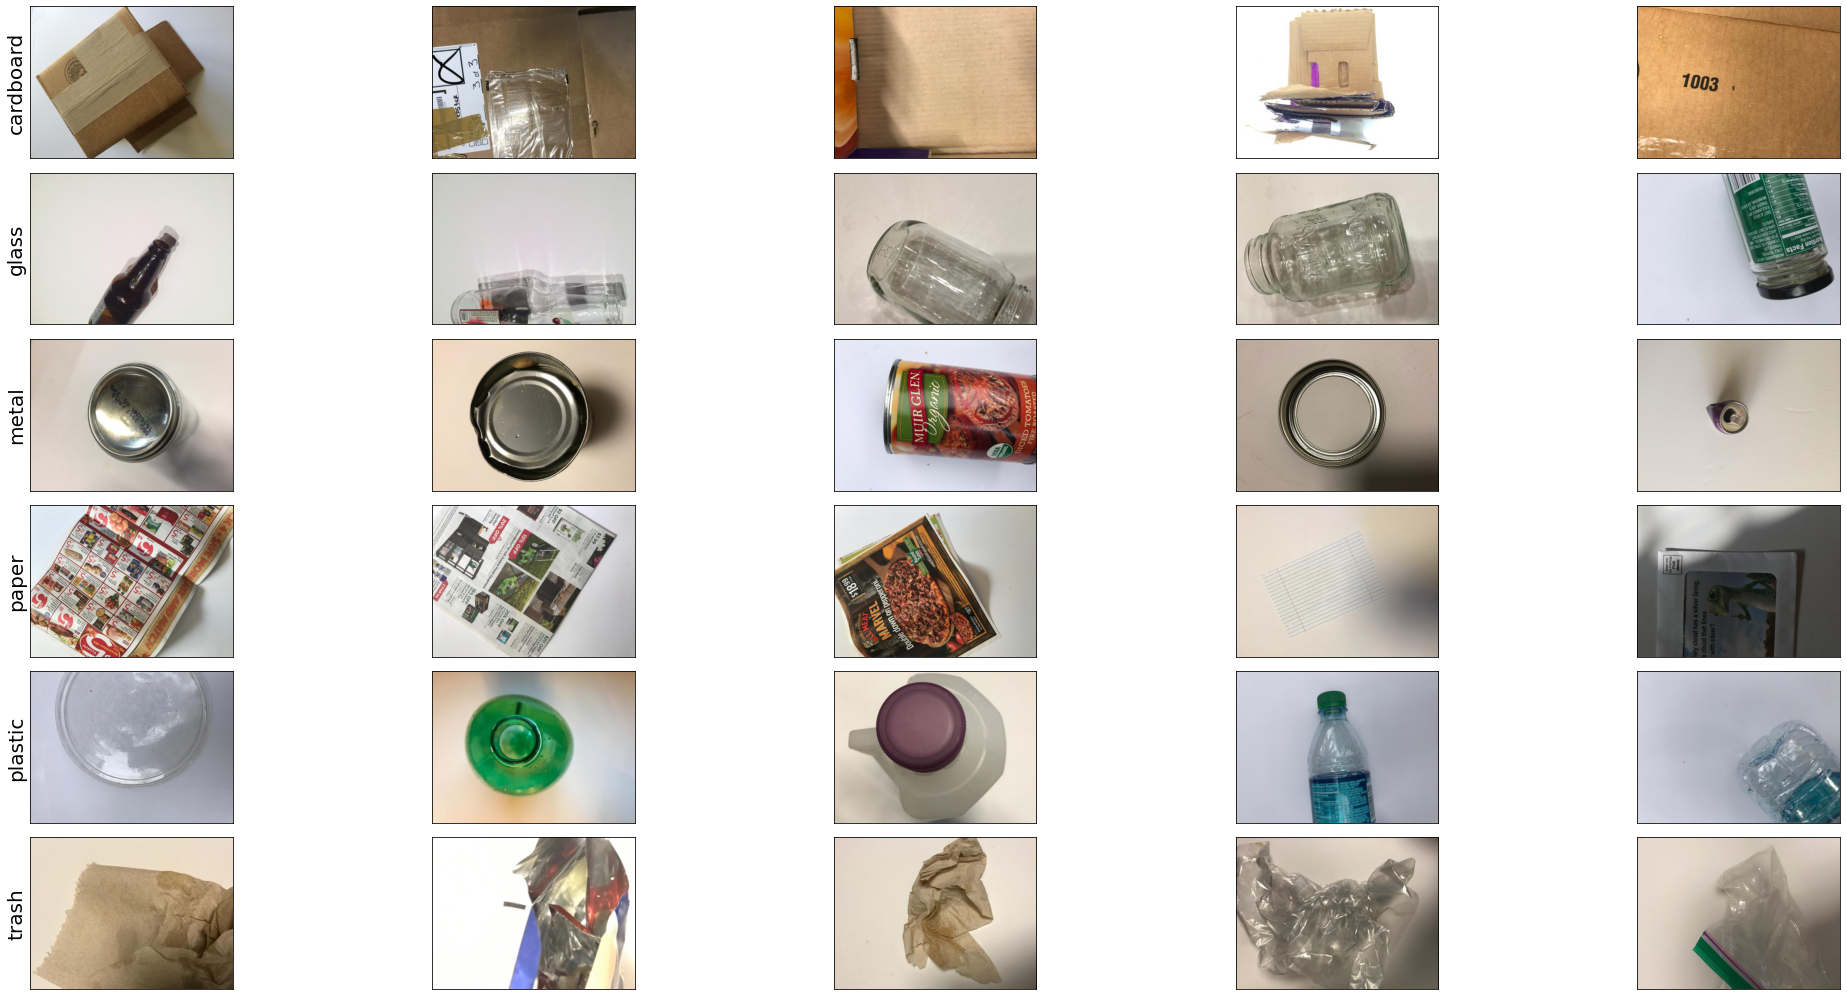

In [ ]:
plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 5, i*5 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 200), batch_size=32, class_mode = 'binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 200), batch_size=32, shuffle = True, class_mode = 'binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Dataset/Garbage/Garbage_v2/model_train_v2.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 196, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 146, 196, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 194, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 144, 194, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 97, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True)]
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/20
64/64 [==============================] - 452s 7s/step - loss: 0.5526 - accuracy: 0.8004 - val_loss: 1.7687 - val_accuracy: 0.5547
Epoch 2/20
64/64 [==============================] - 34s 534ms/step - loss: 0.5310 - accuracy: 0.8108 - val_loss: 1.8162 - val_accuracy: 0.5189
Epoch 3/20
64/64 [==============================] - 34s 538ms/step - loss: 0.5337 - accuracy: 0.8127 - val_loss: 1.3295 - val_accuracy: 0.5785
Epoch 4/20
64/64 [==============================] - 34s 536ms/step - loss: 0.5117 - accuracy: 0.8172 - val_loss: 1.4595 - val_accuracy: 0.5785
Epoch 5/20
64/64 [==============================] - 35s 540ms/step - loss: 0.5079 - accuracy: 0.8236 - val_loss: 1.7875 - val_accuracy: 0.5586
Epoch 6/20
64/64 [==============================] - 34s 535ms/step - loss: 0.4717 - accuracy: 0.8350 - val_loss: 1.1217 - val_accuracy: 0.6521
Epoch 7/20
64/64 [==============================] - 34s 537ms/step - loss: 0.4976 - accuracy: 0.8246 - val_loss: 1.3579 - val_accuracy: 0.6362
E

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(
    y=history.history['loss'],
    mode='lines+markers',
    name='training loss'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    mode='lines+markers',
    name='validation loss'
), row=1, col=1)


fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    mode='lines+markers',
    name='training accuracy'
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='validation accuracy'
), row=1, col=2)

fig.update_xaxes(title_text='Epoch')
fig.update_layout(title_text="Training History Metrics")
fig.show()


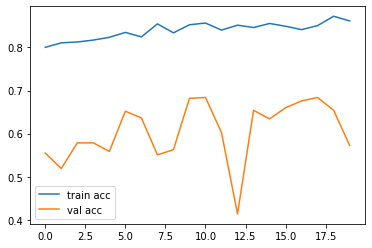

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

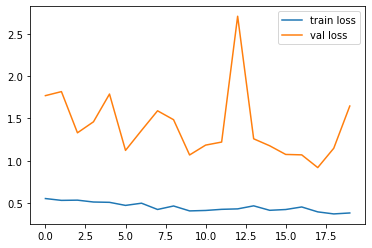

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, 503 // 16+1)
y_train_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_train_pred))
print('Classification Report')
# target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_train_pred, target_names=labels, zero_division=1))

Confusion Matrix
[[28 19  7 22  4  0]
 [37 21  3 22 13  4]
 [25 26  5 13 11  2]
 [44 25 19 14  9  7]
 [38 16 12 22  8  0]
 [13  4  2  4  4  0]]
Classification Report
              precision    recall  f1-score   support

   cardboard       0.15      0.35      0.21        80
       glass       0.19      0.21      0.20       100
       metal       0.10      0.06      0.08        82
       paper       0.14      0.12      0.13       118
     plastic       0.16      0.08      0.11        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.15       503
   macro avg       0.13      0.14      0.12       503
weighted avg       0.14      0.15      0.14       503



In [ ]:
model.save("/content/gdrive/MyDrive/Dataset/Garbage/Garbage_v2/model_train_v3.h5")

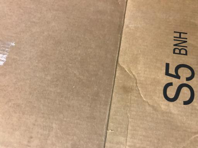

Actual:  cardboard  Prediction:  cardboard


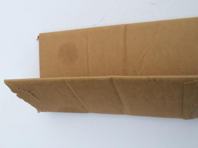

Actual:  cardboard  Prediction:  cardboard


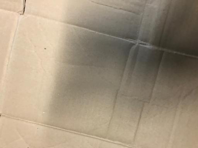

Actual:  cardboard  Prediction:  cardboard


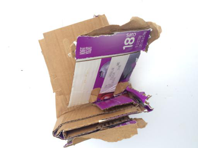

Actual:  cardboard  Prediction:  cardboard


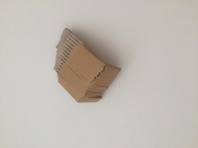

Actual:  cardboard  Prediction:  cardboard


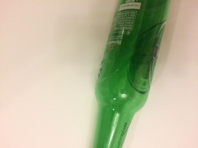

Actual:  glass  Prediction:  glass


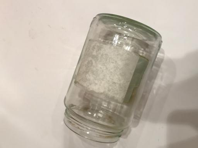

Actual:  glass  Prediction:  glass


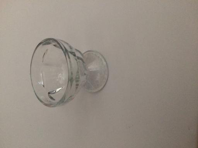

Actual:  glass  Prediction:  cardboard


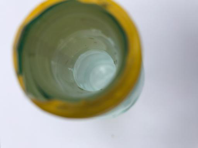

Actual:  glass  Prediction:  glass


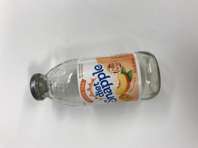

Actual:  glass  Prediction:  cardboard


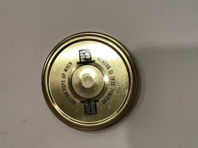

Actual:  metal  Prediction:  metal


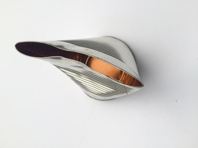

Actual:  metal  Prediction:  metal


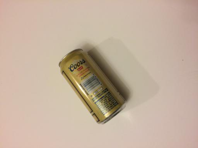

Actual:  metal  Prediction:  glass


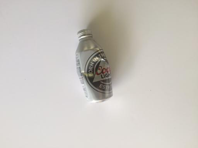

Actual:  metal  Prediction:  metal


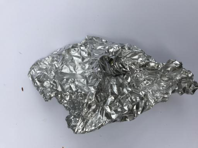

Actual:  metal  Prediction:  metal


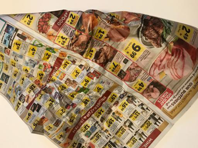

Actual:  paper  Prediction:  paper


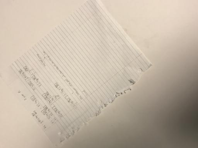

Actual:  paper  Prediction:  paper


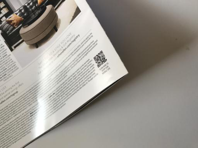

Actual:  paper  Prediction:  paper


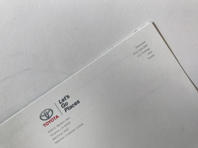

Actual:  paper  Prediction:  paper


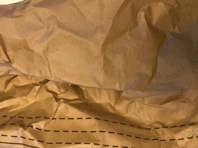

Actual:  paper  Prediction:  cardboard


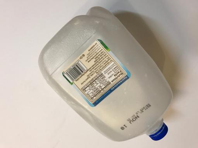

Actual:  plastic  Prediction:  cardboard


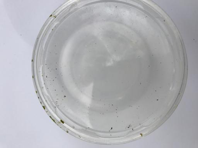

Actual:  plastic  Prediction:  paper


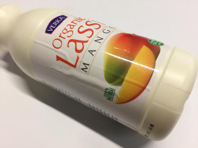

Actual:  plastic  Prediction:  trash


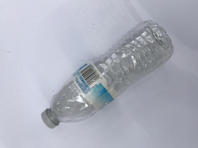

Actual:  plastic  Prediction:  plastic


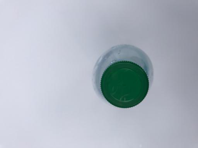

Actual:  plastic  Prediction:  plastic


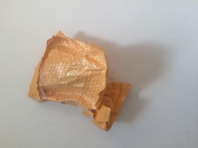

Actual:  trash  Prediction:  trash


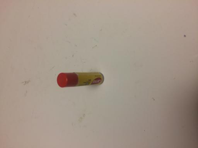

Actual:  trash  Prediction:  cardboard


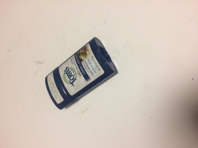

Actual:  trash  Prediction:  glass


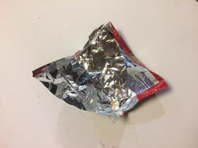

Actual:  trash  Prediction:  glass


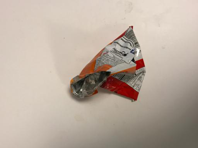

Actual:  trash  Prediction:  glass


In [ ]:
from PIL import Image
#cat = int(input('Enter any category by index: '))
#ind = int(input('Enter any index to test: '))
for cat in range(6):
    directory = os.path.join(train_dir, labels[cat % 6])
    for ind in range(25, 30):
        path = os.path.join(directory, os.listdir(directory)[ind])
        img = Image.open(path)
        img = img.resize((198, 148))
        display(img)
        x = keras.preprocessing.image.img_to_array(img)
        x = x/255
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images)
        pred = labels[np.argmax(classes)]
    
        print("Actual: ", labels[cat % 6], " Prediction: ", pred)

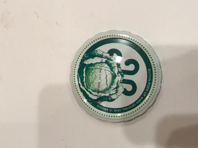

 Prediction:  glass


In [ ]:
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
img = Image.open('/content/gdrive/MyDrive/Dataset/Garbage/Garbage classification/metal/metal22.jpg')
img = img.resize((198, 148))
display(img)
x = keras.preprocessing.image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
pred = labels[np.argmax(classes)]
    
print(" Prediction: ", pred)